In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [9]:
my_data= pd.read_csv('D:/Data Science/Assignment/09Association rule/my_movies.csv')
my_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [10]:
#unnecesary data drop
my_data.drop(['V1','V2','V3','V4','V5'], axis=1,inplace=True)

In [11]:
my_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [13]:
frequent_itemset=apriori(my_data,min_support=0.01,use_colnames=True)
frequent_itemset['length']=frequent_itemset['itemsets'].apply(lambda x: len(x))

In [15]:
frequent_itemset.head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [17]:
rules_movies=association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [19]:
rules_movies[(rules_movies['lift']>1)&(rules_movies['confidence']>=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
6,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
9,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
11,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
13,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
226,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
228,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
229,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
230,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


Text(0, 0.5, 'confidence')

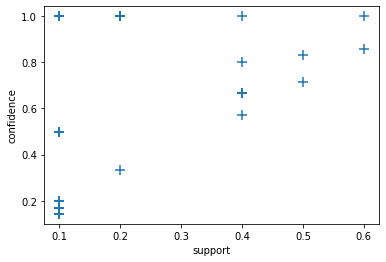

In [26]:
plt.scatter(rules_movies['support'],rules_movies['confidence'],s=100,marker='+')
plt.xlabel('support')
plt.ylabel('confidence')